In [1]:
#writing a basic perceptron model (without backprop or gradient descent)

In [2]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target
print(X.shape,Y.shape)

(569, 30) (569,)


In [4]:
data = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
data['class']  = breast_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
from sklearn.model_selection import train_test_split

X = data.drop('class',axis=1)
Y = data['class']

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=1,stratify=Y)

In [7]:
print(x_train.shape,x_test.shape)

(483, 30) (86, 30)


In [8]:
#feature scaling
x_binarised = x_train.apply(pd.cut,bins=2,labels=[1,0])

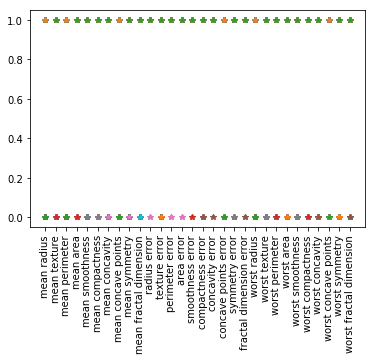

In [9]:
plt.plot(x_binarised.T,"*")
plt.xticks(rotation='vertical')
plt.show()

In [10]:
x_train = x_train.values
x_test = x_test.values

In [28]:
class Perceptron:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    #ek single datapoint ka predict karna
    def model(self,x):
        return 1 if (np.dot(self.w,x) >= self.b) else 0
        
    #given a x predict y as a vector
    def predict(self,x):
        y = []
        for i in x:
            #ek ka predict kara
            result = self.model(i)
            y.append(result)
        return y
          
    #training

    def fit(self,x,y,epochs=1,lr=1):
        
        self.w = np.random.randn(x.shape[1]) #30x1
        self.b = 0
        
        accuracy = {}
        maxacc = 0
        wt_matrix = []
        
        for e in range(epochs):
            for i,j in zip(x,y):
                y_pred = self.model(i)
                if j==1 and y_pred==0:
                    self.w += i*lr
                    self.b += 1*lr
                elif j==0 and y_pred==1:
                    self.w -= i*lr
                    self.b -= 1*lr
            
            wt_matrix.append(self.w)
                
            accuracy[e] = accuracy_score(self.predict(x),y)
            if accuracy[e]>maxacc:
                print(maxacc)
                maxacc = accuracy[e]
                chckptw = self.w
                chckptb = self.b
            plt.plot(accuracy.values())
            
        self.w = chckptw
        self.b = chckptb
            
        plt.ylim(0,1)   
        plt.show();
        return np.array(wt_matrix)

In [29]:
model = Perceptron()

0
0.8488612836438924
0.8530020703933747
0.8902691511387164


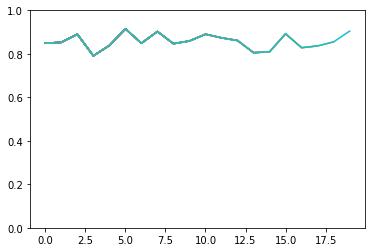

In [37]:
wt_matrix=model.fit(x_train,y_train,20,0.01)

In [38]:
prediction = model.predict(x_test)

In [39]:
acc = accuracy_score(prediction,y_test)
print(acc)

0.9302325581395349


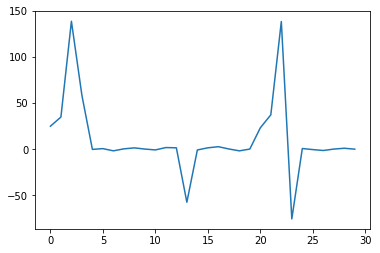

In [40]:
plt.plot(model.w);

In [41]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

In [18]:
#animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

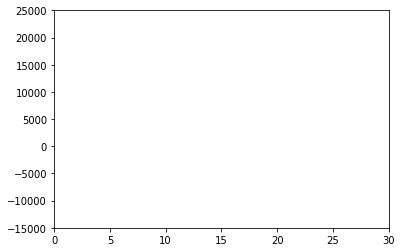

In [19]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-15000, 25000))

line, = ax.plot([], [], lw=2)

In [20]:
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [21]:
# error sorry :p HTML(anim.to_html5_video())